In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Multi_linear.txt', header = None)
x = data.iloc[:, 0:2]
y = data.iloc[:, 2]

data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


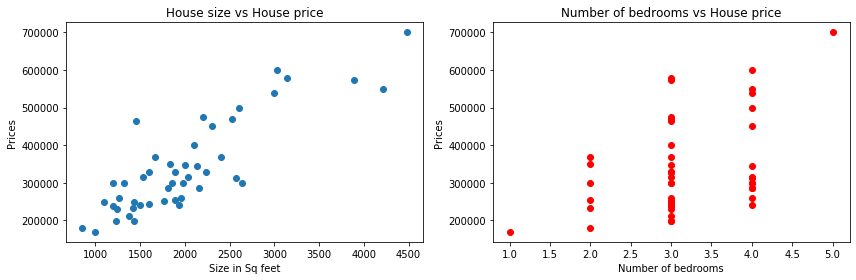

In [4]:
fig, axes = plt.subplots(figsize = (12, 4), nrows = 1, ncols = 2)

axes[0].scatter(x[0], y)
axes[0].set_xlabel('Size in Sq feet')
axes[0].set_ylabel('Prices')
axes[0].set_title('House size vs House price')
axes[1].scatter(x[1], y, color = 'r')
axes[1].set_xlabel('Number of bedrooms')
axes[1].set_ylabel('Prices')
axes[1].set_title('Number of bedrooms vs House price')

plt.tight_layout()

In [34]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

m = len(x)
ones = np.ones((m, 1))
x_normalized, mean, std = featureNormalization(x)
X = np.hstack((ones, x_normalized))
Y = y[:, np.newaxis]
theta = np.zeros((3, 1))

In [6]:
def computeCost(X, y, theta):
    predictions = np.dot(X, theta)
    sq_error = (predictions - y) ** 2
    return 1/(2 * m) * np.sum(sq_error)

J = computeCost(X, Y, theta)
print('Cost: '+ str(J))

Cost: 65591548106.45744


In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    J_history = []
    for i in range(iterations):
        predictions = np.dot(X, theta)
        temp = np.dot(X.T, predictions - y)
        theta = theta - (alpha/m) * temp
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

alpha = 0.01
iterations = 400
theta1, J_history = gradientDescent(X, Y, theta, alpha, iterations)
print('Theta:\n'+ str(theta1))
print('\nCost: '+ str(computeCost(X, Y, theta1)))

Theta:
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]

Cost: 2105448288.6292474


Text(0.5, 1.0, 'Cost function using Gradient Descent')

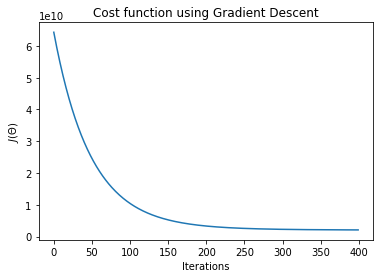

In [8]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

In [47]:
def predict(X, theta):
    return np.dot(X, theta)

print('Enter size (sq ft) and Number of bedrooms')
#sample = list(map(int, input().split()))
sample = np.array([int(i) for i in input().split()])
x_test = (sample - mean) / std
sample_norm = np.hstack((np.ones(1), x_test))
pred = predict(sample_norm, theta1)

print('\nFor size of house = '+ str(sample[0]) +'sq ft, Number of bedroom = '
      + str(sample[1]) +', we predict a house value of $'+ str(np.round(pred[0],2)))

Enter size (sq ft) and Number of bedrooms
2000 5

For size of house = 2000sq ft, Number of bedroom = 5, we predict a house value of $342156.46


In [48]:
sample_norm

array([ 1.00000000e+00, -8.65999486e-04,  2.43050370e+00])